# <u>Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning</U>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Use 'plt' as the alias for matplotlib.pyplot
%matplotlib inline
import seaborn as sns

from warnings import simplefilter  # Use 'simplefilter' for filtering warnings
simplefilter('ignore')  # Correct function name to 'simplefilter'

In [3]:
## Data Collection
df=pd.read_csv(r"C:\Users\ajitm\Data Science Cources\Deep Learning Projects\Stock-Price-Prediction-And-Forecasting-Using-Stacked-LSTM--Deep-Learning\AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
## Using 'close' for forecasting stock price
df1=df.reset_index()['close']

In [6]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [7]:
df1[1000:]

1000    190.08
1001    189.00
1002    183.09
1003    186.60
1004    182.78
         ...  
1253    314.96
1254    313.14
1255    319.23
1256    316.85
1257    318.89
Name: close, Length: 258, dtype: float64

<Axes: ylabel='close'>

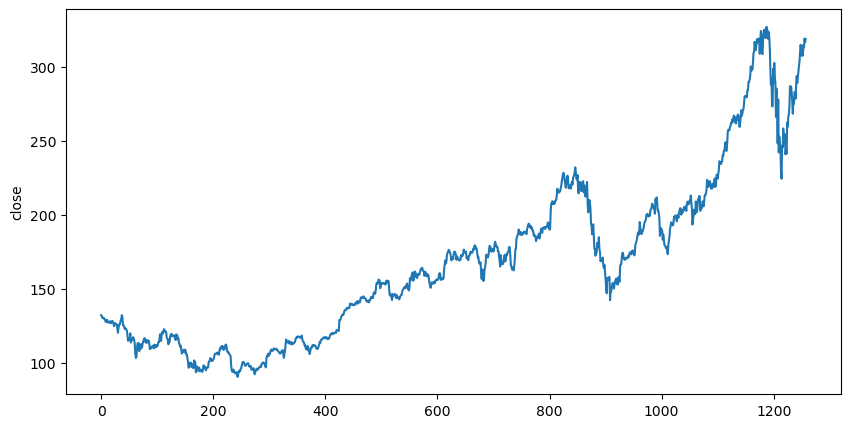

In [8]:
# Plooting graph 
plt.figure(figsize=(10,5))
sns.lineplot(df1)

- LSTM are sensitive to the scale of the data. so we apply MinMax scaler.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(1258, 1)

In [24]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [26]:
## Splitting dataset into traning and test 
training_size=int(len(df)*0.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:], df1[training_size:,:]

In [28]:
training_size, test_size

(817, 441)

In [36]:
train_data[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

In [38]:
test_data[:10]

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645]])

In [40]:
len(test_data)

441

In [44]:
len(train_data)

817

In [46]:
## Converting an array of values into a datasetabs
def create_dataset(dataset, time_step=1):
    '''Function will convert timeseries into input and output'''
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [48]:
# Reshaping dataset into X= t, t+1, t+2, t+3 and Y= t+4
time_step=100
X_train, y_train=create_dataset(train_data, time_step)
X_test, y_test=create_dataset(test_data,  time_step)

In [52]:
print(X_train.shape), print(X_test.shape)

(716, 100)
(340, 100)


(None, None)

In [56]:
print(y_train.shape), print(y_test.shape)

(716,)
(340,)


(None, None)

In [ ]:
## Reshape input in 3 dimension for LSTM
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [68]:
## Create stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [74]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))  # Corrected spelling here
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [76]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 347ms/step - loss: 0.0336 - val_loss: 0.0502
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 0.0023 - val_loss: 0.0039
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - loss: 8.4122e-04 - val_loss: 0.0051
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - loss: 7.4528e-04 - val_loss: 0.0047
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - loss: 7.3754e-04 - val_loss: 0.0036
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step - loss: 6.4849e-04 - val_loss: 0.0035
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 5.6315e-04 - val_loss: 0.0038
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - loss: 5.9698e-04 - val_loss: 0.0034
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - loss: 6.3049e-04 - val_loss: 0.0034
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - loss: 5.6565e-04 - val_loss: 0.0034
Epoch 12

In [88]:
## Prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [90]:
train_predict[:10]

array([[0.08734183],
       [0.08737821],
       [0.08729546],
       [0.08821844],
       [0.09010618],
       [0.09327219],
       [0.09882399],
       [0.10396754],
       [0.10694841],
       [0.10980991]], dtype=float32)

In [92]:
test_predict[:10]

array([[0.26646388],
       [0.26895136],
       [0.27227345],
       [0.27631077],
       [0.27751964],
       [0.27609405],
       [0.27231959],
       [0.2712314 ],
       [0.27228522],
       [0.273238  ]], dtype=float32)

In [94]:
## Transform back to original form by inverse scalling
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [96]:
## calculate RMSE
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

141.16509687317628

In [98]:
## Test Dataset RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

236.60737390203653

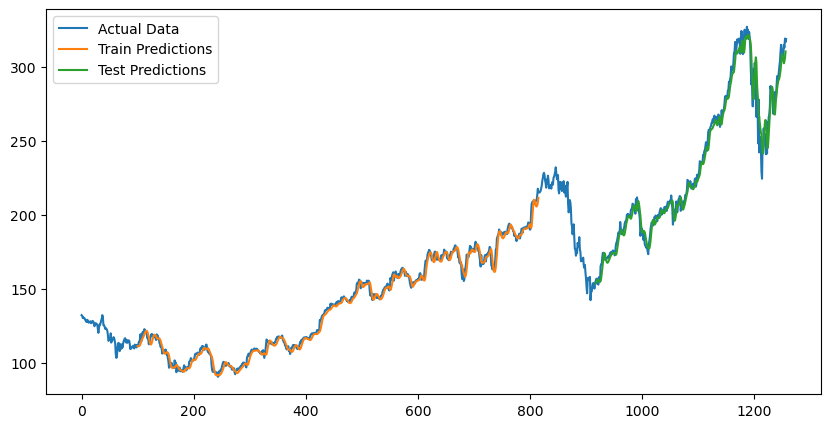

In [110]:
# Plotting 
look_back = 100

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(df1), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')

# Add legend
plt.legend()

# Show plot
plt.show()